In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv('oil_prices_yahoo.csv')

# Exploratory Data Analysis

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-23,31.950001,32.799999,31.950001,32.049999,32.049999,79385
1,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978
2,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131


In [4]:
del data['Open']
del data['High']
del data['Low']
del data['Adj Close']
del data['Volume']

In [5]:
data.tail()

,Date,Close
5747,2023-07-18,75.750000
5748,2023-07-19,75.349998
5749,2023-07-20,75.629997
5750,2023-07-21,77.070000
5751,2023-07-24,78.739998


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5752 entries, 0 to 5751
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5752 non-null   object 
 1   Close   5752 non-null   float64
dtypes: float64(1), object(1)
memory usage: 90.0+ KB


##### we can see that the Date is having object data_type that we need to treat to leverage the data_time faeture 

In [7]:
data.isnull().sum()

Date     0
Close    0
dtype: int64

# Lets Check for Duplicate Value 

In [8]:
data.duplicated().value_counts()

False    5752
dtype: int64

So We dont have any duplicate value

In [9]:
data.describe()

,Close
count,5752.000000
mean,63.856358
std,25.587253
min,-37.630001
25%,44.527499
50%,61.545000
75%,83.459997
max,145.289993


### we can see that we some unwanted data like min close price is showing -37.6 which is not possible 

In [10]:
#lets Check for how many datasets we have such unwanted data 
(data['Close']<0).sum()

1

In [11]:
from datetime import datetime
import calendar
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [12]:
data

,Date,Close
0,2000-08-23,32.049999
1,2000-08-24,31.629999
2,2000-08-25,32.049999
3,2000-08-28,32.869999
4,2000-08-29,32.720001
...,...,...
5747,2023-07-18,75.750000
5748,2023-07-19,75.349998
5749,2023-07-20,75.629997
5750,2023-07-21,77.070000


In [13]:
data1=data.set_index("Date",drop=True)

### Outlier Detection

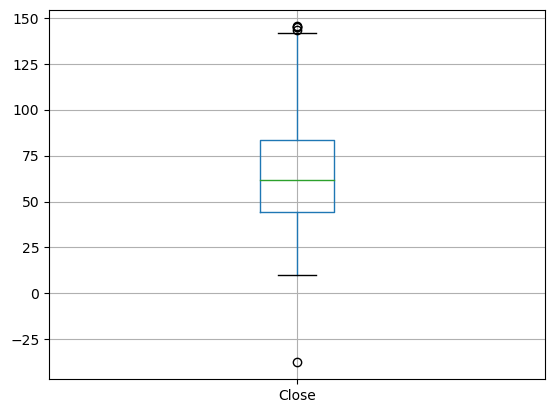

In [14]:
data1.boxplot()
plt.show()

In [15]:
data1.describe()

,Close
count,5752.000000
mean,63.856358
std,25.587253
min,-37.630001
25%,44.527499
50%,61.545000
75%,83.459997
max,145.289993


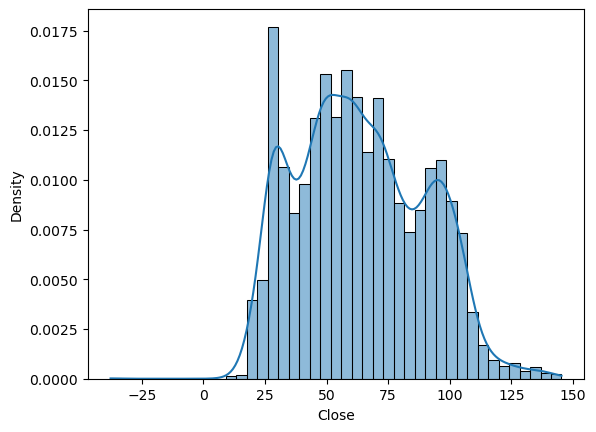

In [16]:
#Lets Look into the distribution of our data
sns.histplot(data['Close'],kde=True,stat="density")
plt.show()

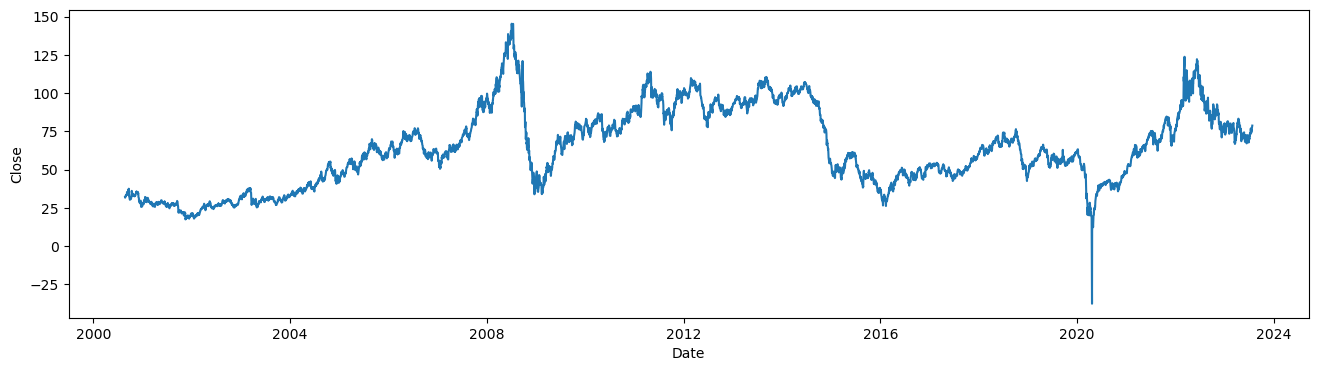

In [17]:
fig, ax = plt.subplots(figsize=(16,4))
sns.lineplot(data=data,x = "Date", y = "Close",ax=ax)
plt.show()

### Box and Whisker Plots by Interval

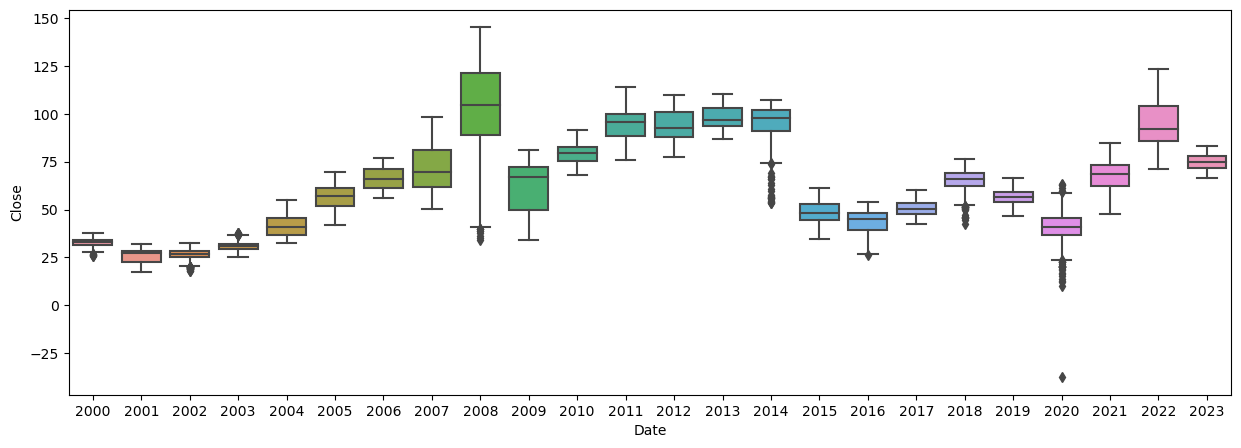

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = data1.index.year, 
                y = data1['Close'], 
                ax = ax)
plt.show()

## Applying IQR Caping Technique to treat Outliers 

In [15]:
# Extract the year from the 'Date' column and create a new column 'Year'
data['Year'] = data['Date'].dt.year
# Group the data by year
grouped = data.groupby('Year')

In [16]:
# Define a function to calculate the upper and lower fences for each group
def iqr_fence(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    return Lower_Fence, Upper_Fence

# Apply the function to each group to calculate the upper and lower fences
fences = grouped['Close'].apply(iqr_fence)


In [18]:
# Define a function to recode the outliers in each group
def recode_outliers(x):
    year = x.name
    lower_fence, upper_fence = fences.loc[year]
    x[x < lower_fence] = lower_fence
    x[x > upper_fence] = upper_fence
    return x

In [19]:
# Apply the function to each group to recode the outliers
data['Close'] = grouped['Close'].apply(recode_outliers)


C:\Users\lenvo\AppData\Local\Temp\ipykernel_3872\4223039696.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data['Close'] = grouped['Close'].apply(recode_outliers)


In [20]:
data2=data.set_index("Date",drop=True)

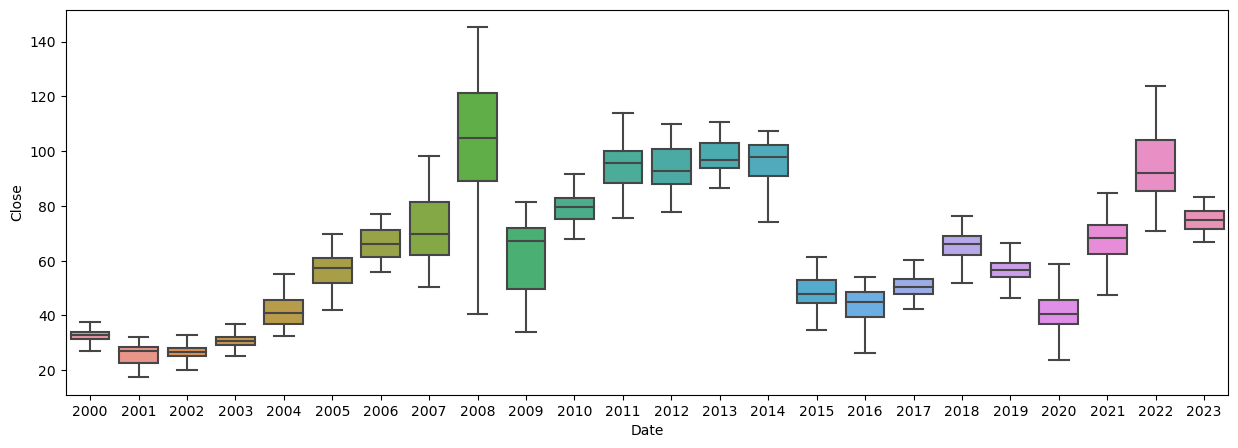

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = data2.index.year, 
                y = data2['Close'], 
                ax = ax)
plt.show()


In [22]:
data2.describe()

,Close,Year
count,5752.000000,5752.000000
mean,63.960716,2011.617524
std,25.511630,6.618666
min,17.450001,2000.000000
25%,44.544999,2006.000000
50%,61.660000,2012.000000
75%,83.459997,2017.000000
max,145.289993,2023.000000


In [23]:
del data2['Year']

## Lag Plot

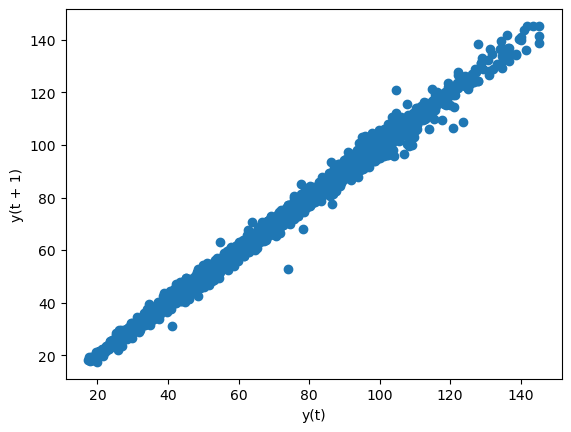

In [24]:
from pandas.plotting import lag_plot
lag_plot(data2)
plt.show()

# OBSERVATIONS:
    1)Distribution of the model :  The lag plot is linear,hence the underlying structure is of the autoregressive model( it predicts future values based on past values).
     2)Outliers : There are some outliers but they are not very far from my data points so removing them might effect my future data.
     3)Randomness in data: There in not much randomness in our data 
     4)Seasonality : our data doesn't have seasonality
     5)Autocorrelation: Our data have strong autocorrelation 
    

### ACF PLOT / CORRELOGRAM

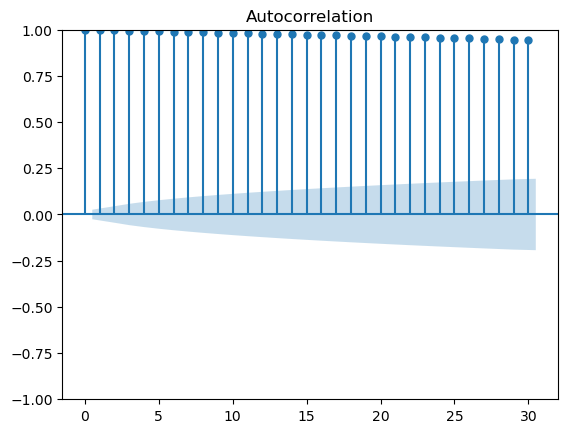

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2,lags=30)
plt.show()


# Hence we can conclude that our data is Statistically significant for forcasting since for each of its laged versions yt-k rk(Autocorrelation coefficient for K step lag) has significantly crossed the treshold value of +2SE(rk) i.e Standard Error.

# Hence we can move ahead with this data for building our  FORCASTING MODEL


### Before Moving ahead with Model Building lets look into some Time-Series Visualization by applying some feature Engineering Techniques 

# Time Resampling

In [29]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

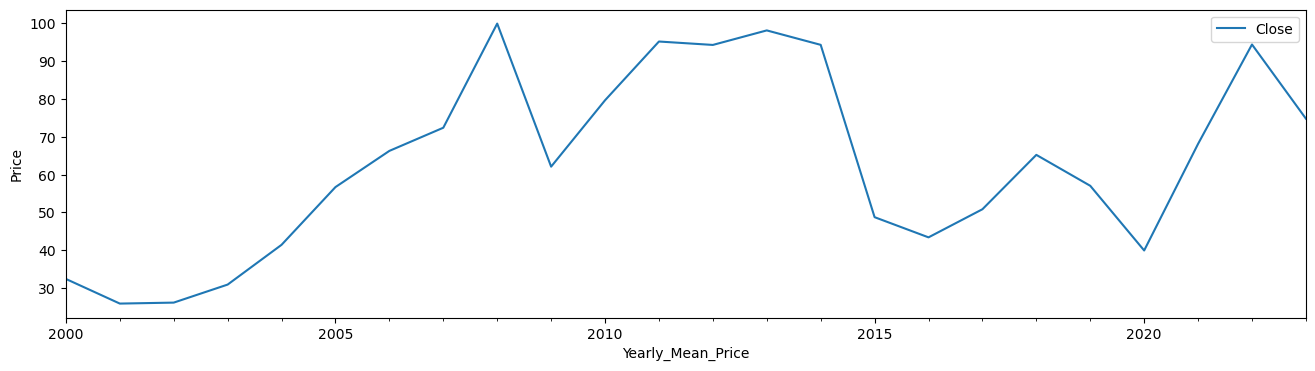

In [30]:
#"RULE A Which Means Year and Frequency"
fig, ax = plt.subplots(figsize=(16,4))
data2.resample(rule='A').mean().plot(ax=ax).set(xlabel='Yearly_Mean_Price', ylabel='Price')
plt.show()

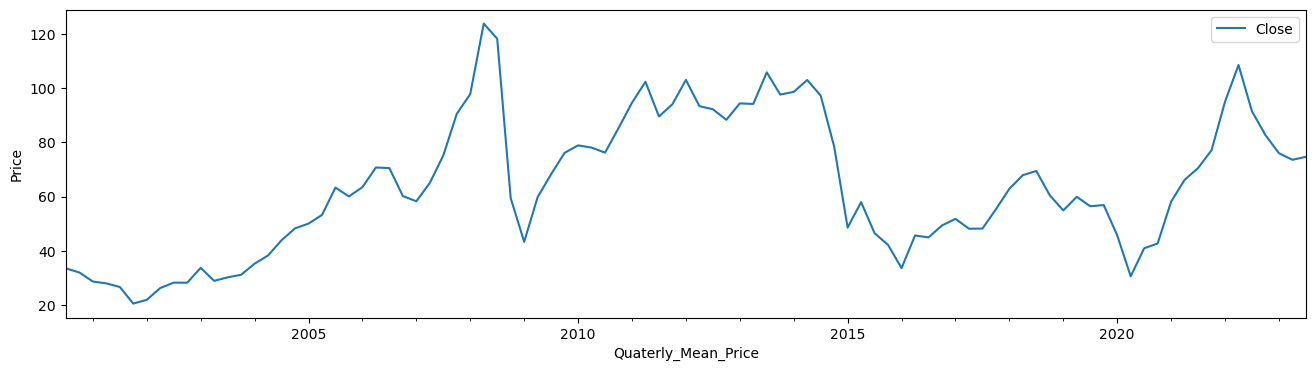

In [31]:
#"RULE QS Which Means Quaterly and Frequency"
fig, ax = plt.subplots(figsize=(16,4))
data2.resample(rule='QS').mean().plot(ax=ax).set(xlabel='Quaterly_Mean_Price', ylabel='Price')
plt.show()

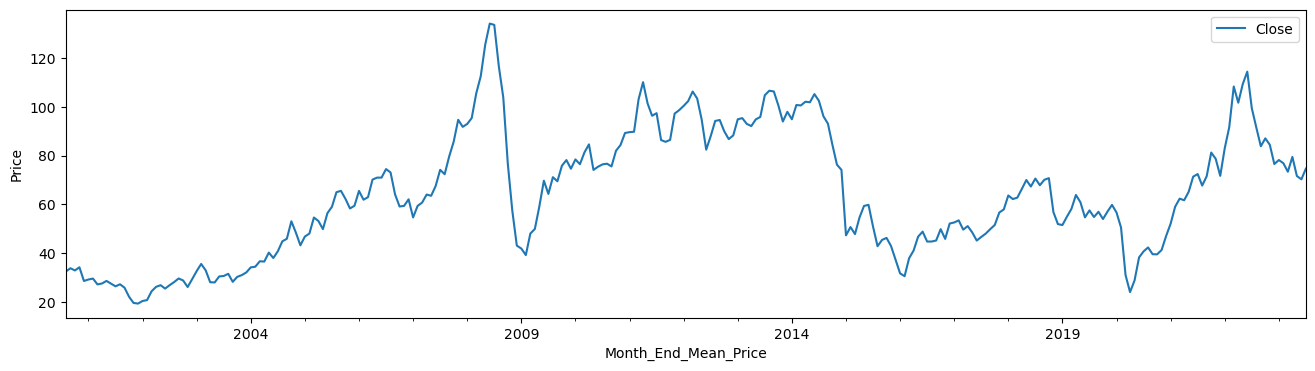

In [32]:
#"RULE M Which Means Month_End and Frequency"
fig, ax = plt.subplots(figsize=(16,4))
data2.resample(rule='M',).mean().plot(ax=ax).set(xlabel='Month_End_Mean_Price', ylabel='Price')
plt.show()

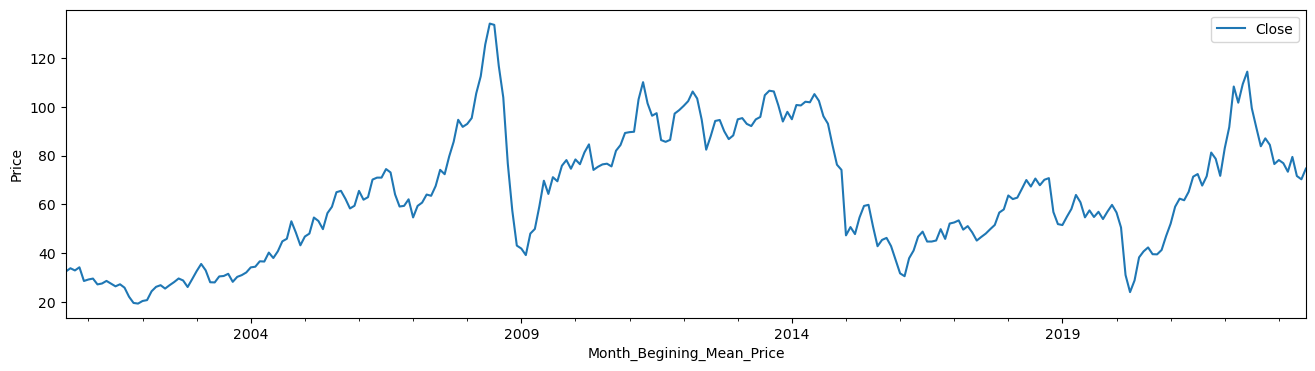

In [33]:
#"RULE M Which Means Month_Begin and Frequency"
fig, ax = plt.subplots(figsize=(16,4))
data2.resample(rule='MS',).mean().plot(ax=ax).set(xlabel='Month_Begining_Mean_Price', ylabel='Price')
plt.show()

### We Dont have much of information from Time Resampling ...Lets Move Ahead 

# Lets Check for the Stationarity of data 
## Augmented Dickey-Fuller Test

In [36]:
#ADF Test - Null Hypothesis --> Non Stationary if p_Value<0.05 Reject null Hypothesis
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

### So we can see that we have a problem ...our data is  stationary . To start with model building first we have make this data non -Stationary  

In [34]:
def test_stationary(timeseries):
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['Close'],autolag='AIC')
    if dftest[1]>0.05:
        print('Fail to reject Null Hypothesis,our Data is Non Stationary')
    else:
        print('Reject Null Hypothesis,Our Data is Stationary') 
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

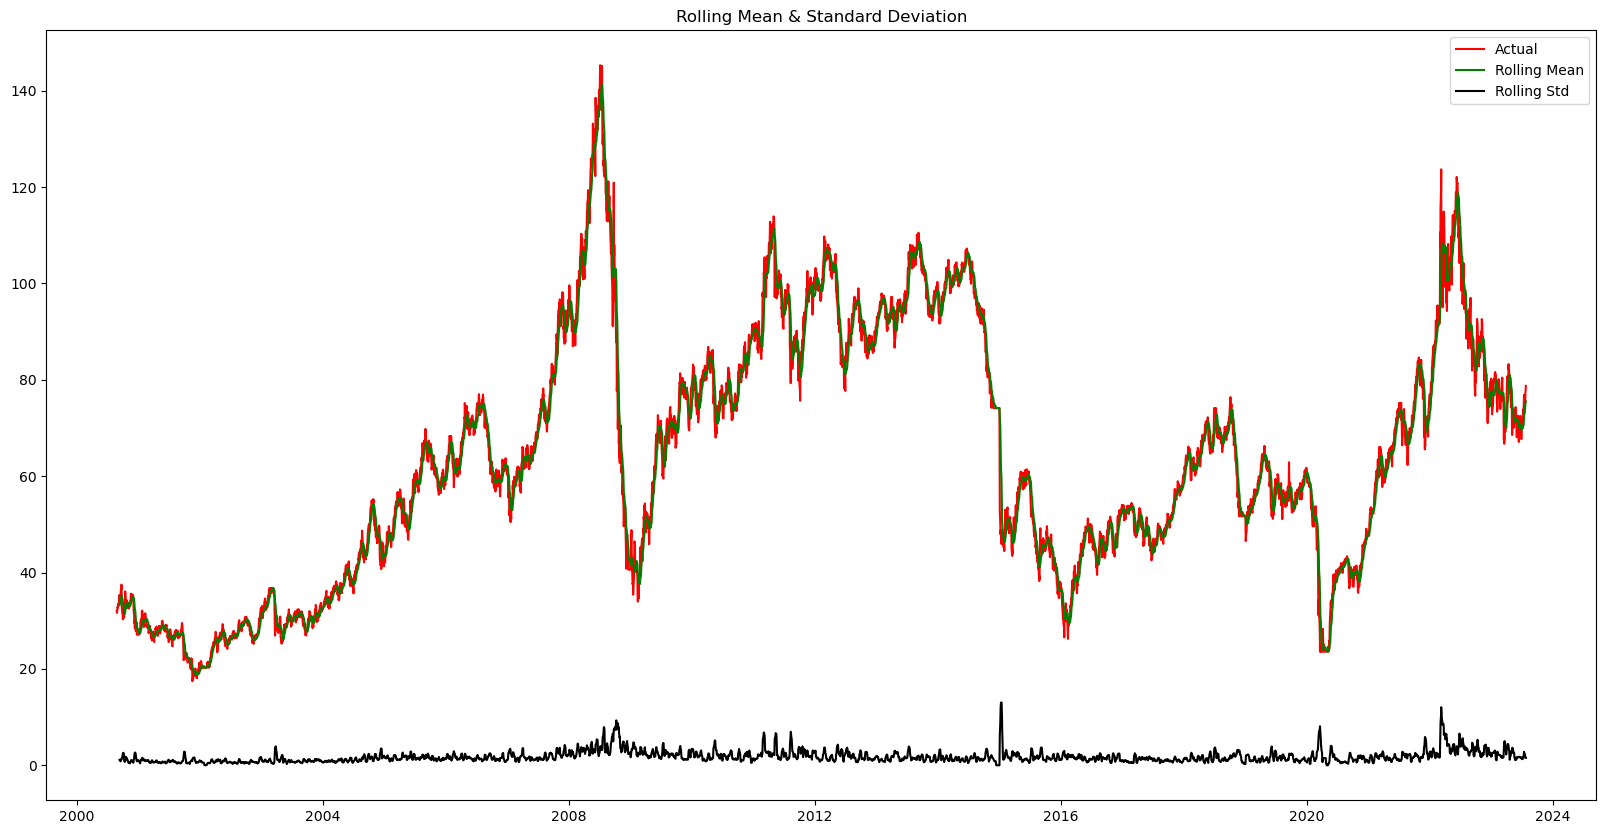

Dickey-Fuller Test: 
Fail to reject Null Hypothesis,our Data is Non Stationary
Test Statistic            -2.605304
p-value                    0.091906
Lags Used                 32.000000
No. of Obs              5719.000000
Critical Value (1%)       -3.431494
Critical Value (5%)       -2.862046
Critical Value (10%)      -2.567039
dtype: float64


In [36]:
test_stationary(data2)

### So we can see that we have a problem ...our data is stationary . To start with model building first we have make this data non -Stationary

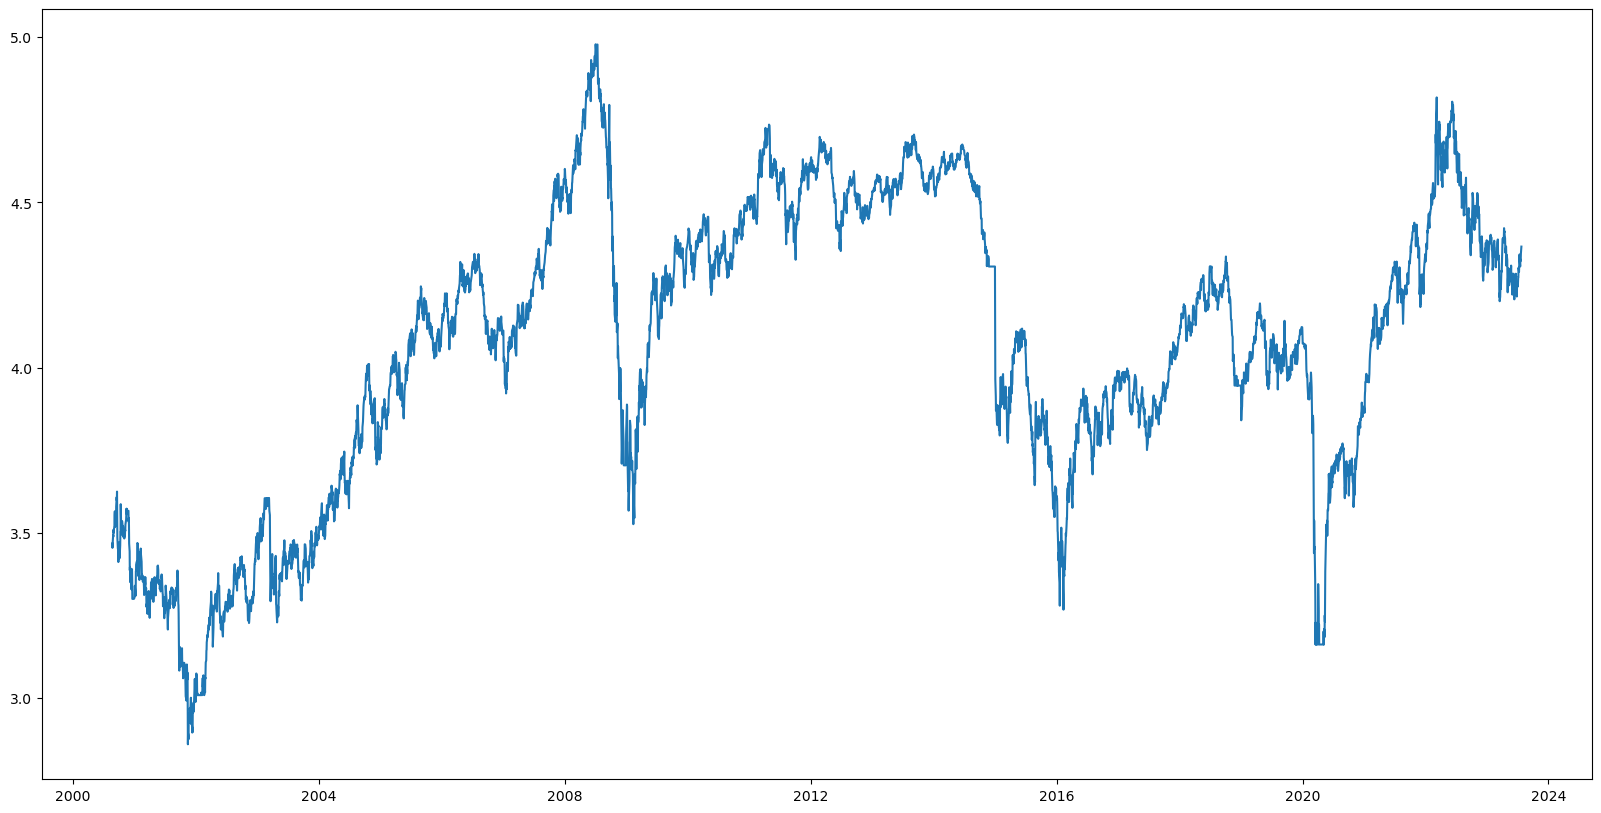

In [29]:
plt.figure(figsize=(20,10))
data_log=np.log(data2)
plt.plot(data_log)
plt.show()

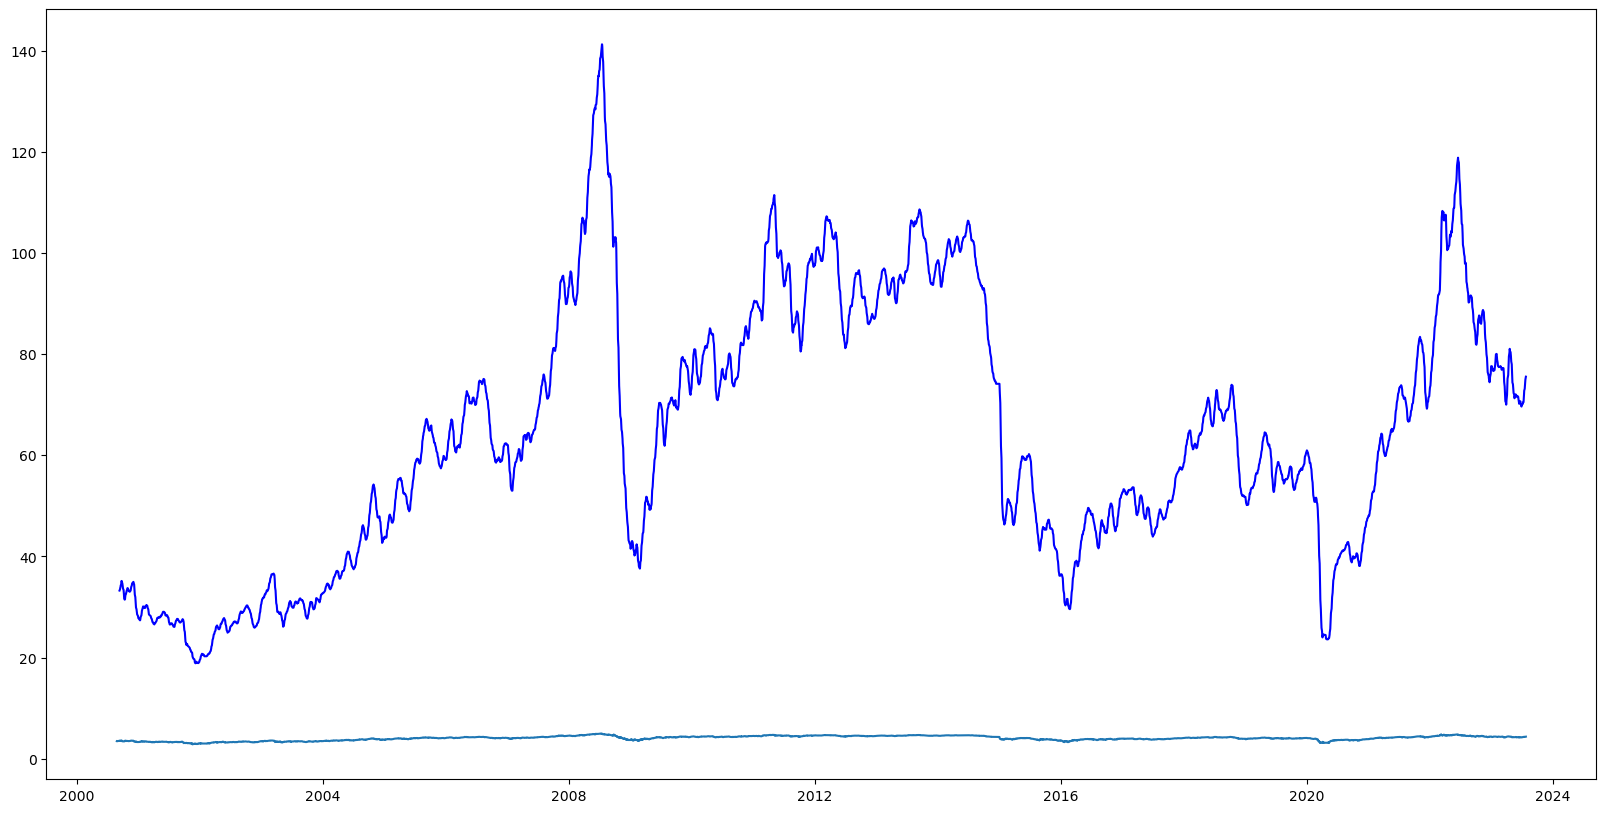

In [30]:
plt.figure(figsize=(20,10))
MAvg=data2.rolling(window=12).mean()
MStd=data2.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')
plt.show()

In [31]:
data_diff=data2-MAvg
data_diff.head(12)

,Close
Date,
2000-08-23,NaN
2000-08-24,NaN
2000-08-25,NaN
2000-08-28,NaN
2000-08-29,NaN
2000-08-30,NaN
2000-08-31,NaN
2000-09-01,NaN
2000-09-05,NaN


In [32]:
data_diff=data_diff.dropna()
data_diff.head()

,Close
Date,
2000-09-08,0.451667
2000-09-11,1.597498
2000-09-12,0.483334
2000-09-13,-0.062501
2000-09-14,0.134998


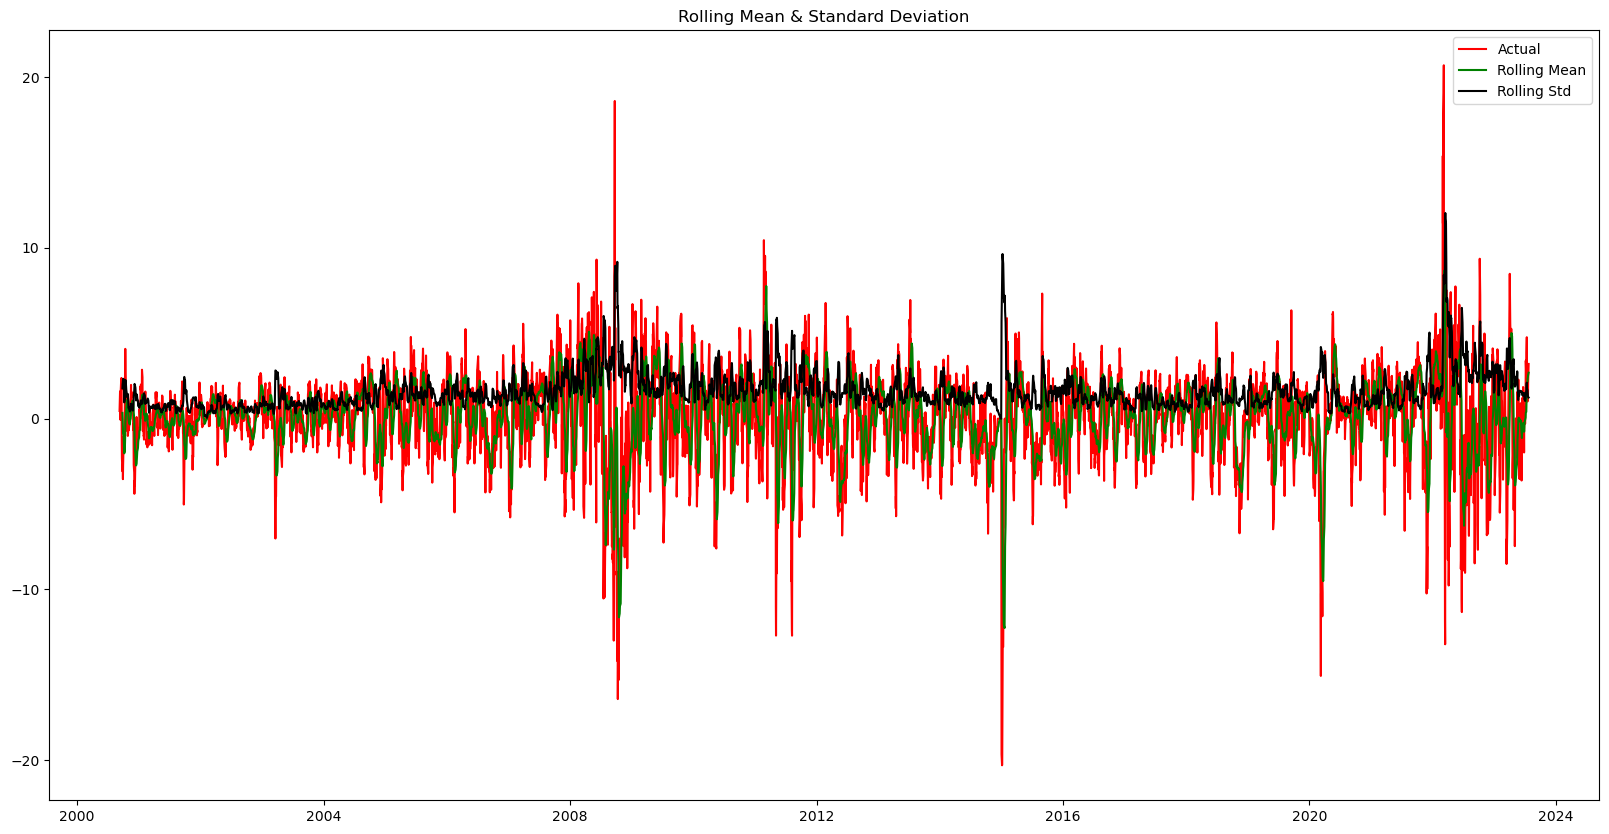

Dickey-Fuller Test: 
Reject Null Hypothesis,Our Data is Stationary
Test Statistic         -1.173326e+01
p-value                 1.326104e-21
Lags Used               2.600000e+01
No. of Obs              5.714000e+03
Critical Value (1%)    -3.431495e+00
Critical Value (5%)    -2.862046e+00
Critical Value (10%)   -2.567039e+00
dtype: float64


In [37]:
test_stationary(data_diff)

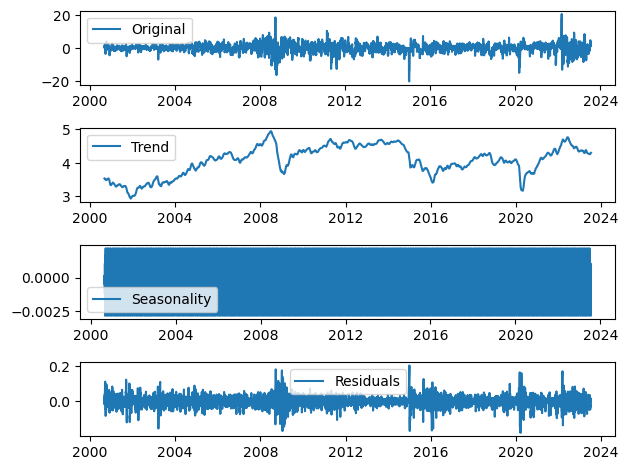

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log,period=20)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

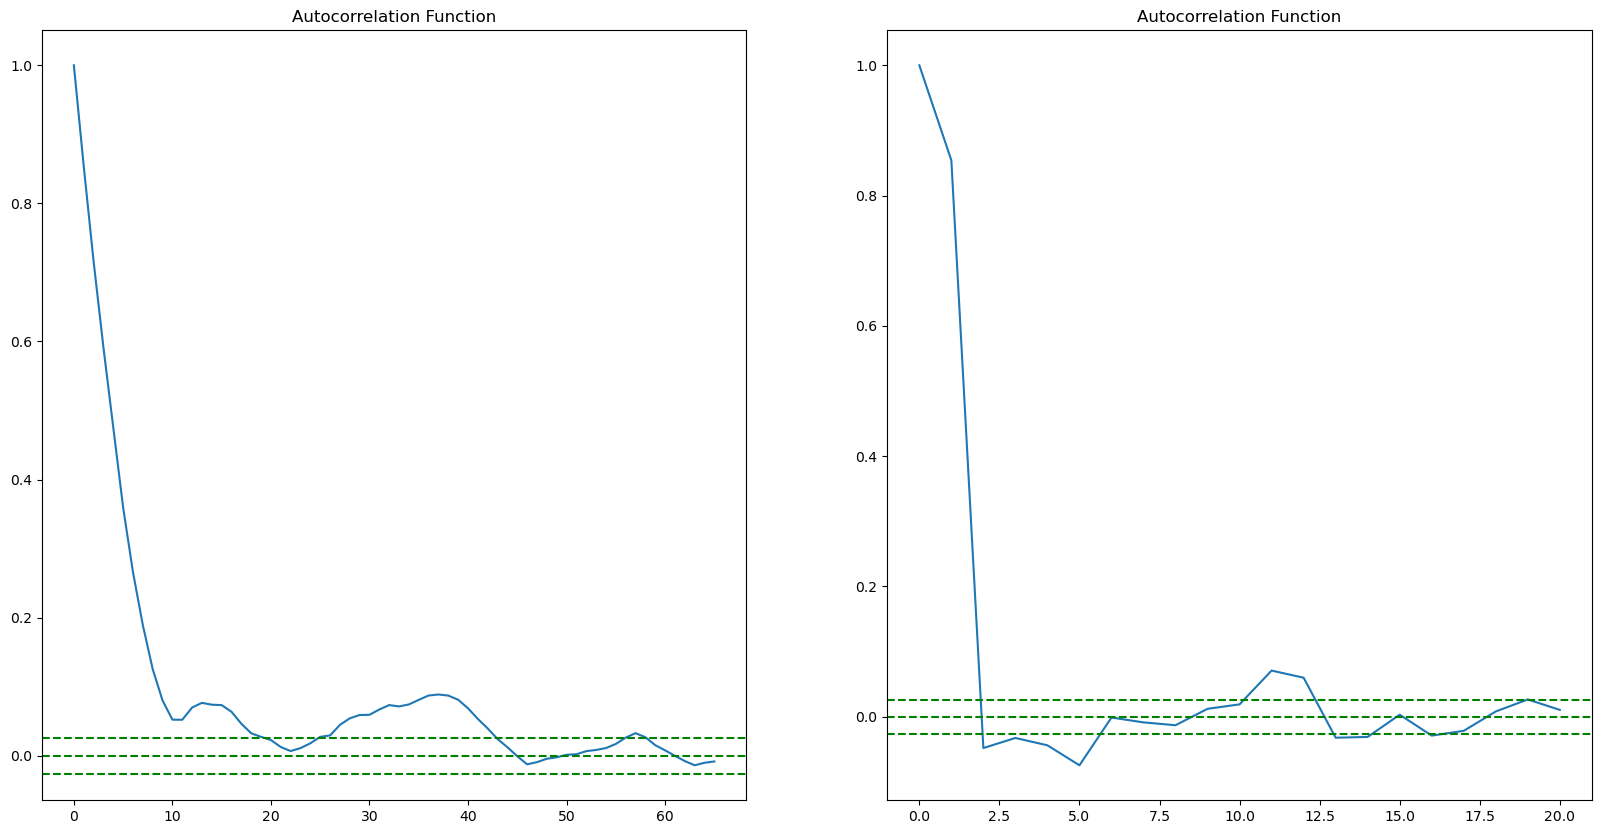

In [211]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(data_diff, nlags=65)
lag_pacf=pacf(data_diff, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(data_diff)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(data_diff)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.show()

### From above ACF plot upto 45 lags are above +2SE and its highly direct and indirect correlated.But when we consider for PACF we can see that almost at 2 lag it has touched 0 for the forst time  so which shows very less correlation compared to first two so passimoniuosly we can select ACF AS 20 lag and PACF 2 Which will be use full for AR and MA building time.

In [45]:
import pmdarima
from pmdarima.arima import auto_arima

In [239]:
model_auto=auto_arima(data2)

In [240]:
model_auto

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [241]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5752
Model:               SARIMAX(2, 1, 3)   Log Likelihood              -10643.691
Date:                Wed, 09 Aug 2023   AIC                          21299.382
Time:                        23:42:05   BIC                          21339.325
Sample:                             0   HQIC                         21313.283
                               - 5752                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0049      0.109     -9.245      0.000      -1.218      -0.792
ar.L2         -0.5799      0.111     -5.223      0.000      -0.797      -0.362
ma.L1          0.9814      0.108      9.124      0.000       0.771       1.192
ma.L2          0.5272      0.112      4.725      0.000       0.308       0.746
ma.L3         -0.0561      0.007     -8.058      0.000      -0.070      -0.042
sigma2         2.3718      0.015    155.869      0.000       2.342       2.402
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             57176.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.26   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [301]:
train=data_diff.loc[:'2020-1-31']
test = data_diff.loc['2020-1-31':]

In [255]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4878 entries, 2000-08-23 to 2020-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4878 non-null   float64
dtypes: float64(1)
memory usage: 76.2 KB


In [256]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 875 entries, 2020-01-31 to 2023-07-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   875 non-null    float64
dtypes: float64(1)
memory usage: 13.7 KB


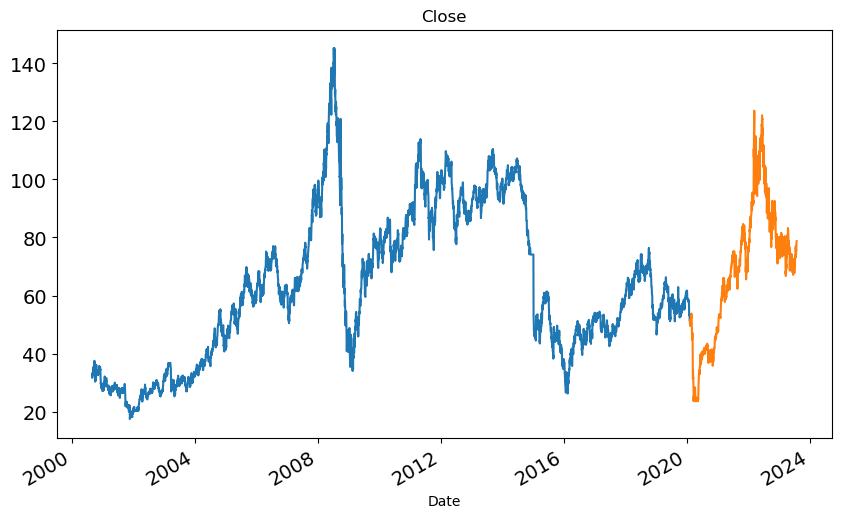

In [257]:
train.Close.plot(figsize=(10,6),title= "Close", fontsize=14)
test.Close.plot(figsize=(10,6),title= "Close", fontsize=14)
plt.show()

In [299]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train,
               order=(2,1,3),seasonal_order=(0,0,0,0)).fit()

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [300]:
start_value = pd.to_datetime('2020-01-31')
end_value = pd.to_datetime('2023-07-24')

In [302]:
start_index = data_diff.index.get_loc(start_value)
end_index = data_diff.index.get_loc(end_value)

In [303]:

pred_SARIMAX= model.predict(start=start_index,end=end_index)


C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [304]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,pred_SARIMAX))
print(rmse)

3.5143082298372463


In [312]:
predict=model.predict(start=start_index,end=end_index)
predict=np.exp(predict)
test['pred_SARIMAX']=predict.values
test

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1381308659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_SARIMAX']=predict.values


,Close,pred_ARIMA,pred_SARIMAX
Date,,,
2020-01-31,-3.721666,0.081935,0.042099
2020-02-03,-4.530000,0.129852,0.041279
2020-02-04,-4.287500,0.574049,0.067628
2020-02-05,-2.498334,1.022439,0.101648
2020-02-06,-1.682500,1.022439,0.144889
...,...,...,...
2023-07-18,2.111666,1.022439,1.009040
2023-07-19,1.319165,1.022439,1.009040
2023-07-20,1.112497,1.022439,1.009040


In [306]:
ARIMAmodel=ARIMA(train,order=(2,1,2))


C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [307]:
ARIMAresult=ARIMAmodel.fit()


C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [308]:
ARIMAresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4867
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8276.846
Date:                Thu, 10 Aug 2023   AIC                          16563.693
Time:                        00:04:31   BIC                          16596.143
Sample:                             0   HQIC                         16575.082
                               - 4867                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0458      0.097     -0.473      0.637      -0.236       0.144
ar.L2          0.7770      0.081      9.540      0.000       0.617       0.937
ma.L1         -0.1027      0.099     -1.039      0.299      -0.297       0.091
ma.L2         -0.8971      0.100     -9.006      0.000      -1.092      -0.702
sigma2         1.7553      0.013    134.247      0.000       1.730       1.781
===================================================================================
Ljung-Box (L1) (Q):                   3.46   Jarque-Bera (JB):             72220.32
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                            -0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [309]:

pred_ARIMA= ARIMAresult.predict(start=start_index,end=end_index)

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [310]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['Close'],pred_ARIMA))
print(rmse)

3.513398120715286


In [311]:
predict=AR1RESULT.predict(start=start_index,end=end_index)
predict=np.exp(predict)
test['pred_ARIMA']=predict.values
test

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2744126413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_ARIMA']=predict.values


,Close,pred_ARIMA
Date,,
2020-01-31,-3.721666,0.081935
2020-02-03,-4.530000,0.129852
2020-02-04,-4.287500,0.574049
2020-02-05,-2.498334,1.022439
2020-02-06,-1.682500,1.022439
...,...,...
2023-07-18,2.111666,1.022439
2023-07-19,1.319165,1.022439
2023-07-20,1.112497,1.022439


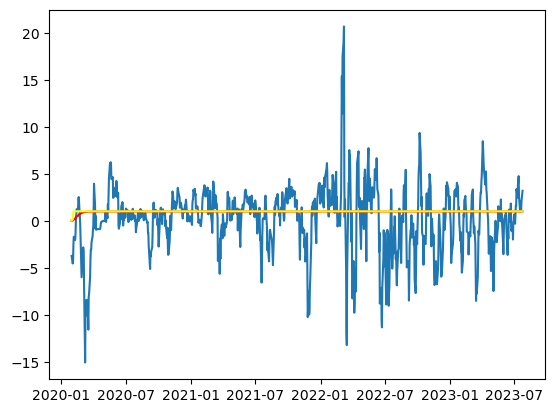

In [314]:
# plotting the data
plt.plot(test['Close'])
plt.plot(test['pred_SARIMAX'], color='red')
plt.plot(test['pred_ARIMA'], color='Yellow')
plt.show()


## Lets Look for the prediction for AR and MA Seperately with respect to the P,Q Value from our ACF and PACF plot

In [213]:
from statsmodels.tsa.arima.model import ARIMA
ARmodel=ARIMA(train,order=(45,0,0))

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [214]:
AR1RESULT=ARmodel.fit()


In [215]:
AR1RESULT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4867
Model:                ARIMA(45, 0, 0)   Log Likelihood               -8207.788
Date:                Wed, 09 Aug 2023   AIC                          16509.575
Time:                        21:06:58   BIC                          16814.616
Sample:                             0   HQIC                         16616.633
                               - 4867                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0215      0.148      0.145      0.885      -0.269       0.312
ar.L1          0.8665      0.008    103.954      0.000       0.850       0.883
ar.L2          0.0082      0.014      0.602      0.547      -0.019       0.035
ar.L3          0.0036      0.014      0.251      0.802      -0.024       0.032
ar.L4          0.0226      0.014      1.580      0.114      -0.005       0.051
ar.L5         -0.0653      0.012     -5.461      0.000      -0.089      -0.042
ar.L6          0.0332      0.015      2.235      0.025       0.004       0.062
ar.L7         -0.0260      0.015     -1.747      0.081      -0.055       0.003
ar.L8         -0.0263      0.014     -1.860      0.063      -0.054       0.001
ar.L9         -0.0032      0.014     -0.227      0.821      -0.031       0.024
ar.L10        -0.0346      0.013     -2.691      0.007      -0.060      -0.009
ar.L11        -0.0048      0.015     -0.317      0.751      -0.034       0.025
ar.L12         0.0915      0.015      6.012      0.000       0.062       0.121
ar.L13        -0.0105      0.015     -0.716      0.474      -0.039       0.018
ar.L14        -0.0139      0.012     -1.118      0.263      -0.038       0.010
ar.L15         0.0111      0.016      0.704      0.481      -0.020       0.042
ar.L16        -0.0141      0.015     -0.937      0.349      -0.044       0.015
ar.L17        -0.0207      0.014     -1.497      0.135      -0.048       0.006
ar.L18         0.0022      0.013      0.163      0.871      -0.024       0.028
ar.L19         0.0106      0.015      0.694      0.488      -0.019       0.040
ar.L20         0.0180      0.014      1.311      0.190      -0.009       0.045
ar.L21        -0.0313      0.014     -2.254      0.024      -0.059      -0.004
ar.L22         0.0081      0.013      0.639      0.523      -0.017       0.033
ar.L23         0.0168      0.015      1.145      0.252      -0.012       0.046
ar.L24        -0.0065      0.015     -0.437      0.662      -0.036       0.023
ar.L25         0.0373      0.016      2.372      0.018       0.006       0.068
ar.L26        -0.0443      0.014     -3.081      0.002      -0.073      -0.016
ar.L27         0.0303      0.014      2.148      0.032       0.003       0.058
ar.L28        -0.0211      0.015     -1.401      0.161      -0.051       0.008
ar.L29        -0.0041      0.015     -0.265      0.791      -0.034       0.026
ar.L30        -0.0013      0.015     -0.084      0.933      -0.031       0.029
ar.L31         0.0082      0.013      0.610      0.542      -0.018       0.034
ar.L32         0.0124      0.014      0.870      0.384      -0.016       0.040
ar.L33        -0.0221      0.015     -1.506      0.132      -0.051       0.007
ar.L34         0.0255      0.016      1.639      0.101      -0.005       0.056
ar.L35         0.0181      0.016      1.159      0.246      -0.013       0.049
ar.L36        -0.0142      0.015     -0.936      0.349      -0.044       0.016
ar.L37         0.0071      0.015      0.481      0.631      -0.022       0.036
ar

In [216]:
pred_AR= AR1RESULT.predict(start=start_index,end=end_index)

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [217]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,pred_AR))
print(rmse)

3.498021154235061


In [218]:
predict=AR1RESULT.predict(start=start_index,end=end_index)
predict=np.exp(predict)
test['pred_AR']=predict.values
test

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\609814088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_AR']=predict.values


,Close,pred_AR
Date,,
2020-01-31,-3.721666,0.044028
2020-02-03,-4.530000,0.044514
2020-02-04,-4.287500,0.084130
2020-02-05,-2.498334,0.162026
2020-02-06,-1.682500,0.303730
...,...,...
2023-07-18,2.111666,1.021760
2023-07-19,1.319165,1.021760
2023-07-20,1.112497,1.021760


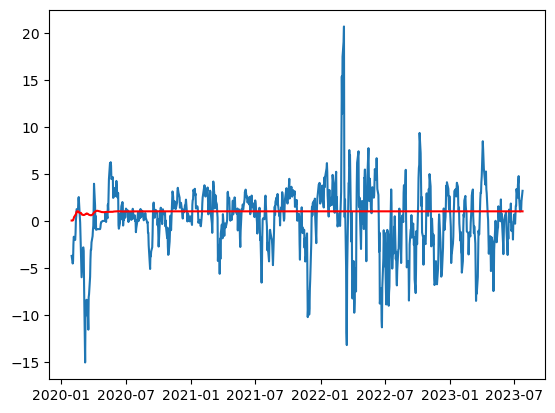

In [219]:
# plotting the data
plt.plot(test['Close'])
plt.plot(test['pred_AR'], color='red')
plt.show()

In [220]:
from statsmodels.tsa.arima.model import ARIMA
MAmodel=ARIMA(train,order=(0,0,2))

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [222]:
MARESULT=MAmodel.fit()


In [223]:
MARESULT.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4867
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -9014.102
Date:                Wed, 09 Aug 2023   AIC                          18036.204
Time:                        21:09:15   BIC                          18062.165
Sample:                             0   HQIC                         18045.315
                               - 4867                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.053      0.416      0.678      -0.082       0.127
ma.L1          0.8869      0.006    145.087      0.000       0.875       0.899
ma.L2          0.4732      0.007     72.063      0.000       0.460       0.486
sigma2         2.3776      0.019    122.375      0.000       2.339       2.416
===================================================================================
Ljung-Box (L1) (Q):                 145.55   Jarque-Bera (JB):             26549.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.93   Skew:                            -0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [224]:
pred_MA= MARESULT.predict(start=start_index,end=end_index)

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [227]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,pred_MA))
print(rmse)

3.519869821139532


In [318]:
def MAPE(pred,orig):
  temp=np.abs((pred-orig)/pred)*100
  return np.mean(temp)

In [319]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [321]:
SES=[]
x=np.linspace(0.1,1,20)
for i in x:
    ses_model=SimpleExpSmoothing(train).fit(smoothing_level=i)
    test_pred_ses = ses_model.forecast(69)

    score_simple=MAPE(test_pred_ses,test.Close)
    SES.append((i,score_simple))
    print("smoothing_level ",i,"-->","MAPE Error",score_simple)

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\l

smoothing_level  0.1 --> MAPE Error nan
smoothing_level  0.1473684210526316 --> MAPE Error nan
smoothing_level  0.19473684210526315 --> MAPE Error nan
smoothing_level  0.24210526315789474 --> MAPE Error nan


C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\stats

smoothing_level  0.2894736842105263 --> MAPE Error nan
smoothing_level  0.33684210526315794 --> MAPE Error nan
smoothing_level  0.38421052631578945 --> MAPE Error nan
smoothing_level  0.43157894736842106 --> MAPE Error nan
smoothing_level  0.4789473684210527 --> MAPE Error nan


C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\stats

smoothing_level  0.5263157894736842 --> MAPE Error nan
smoothing_level  0.5736842105263158 --> MAPE Error nan
smoothing_level  0.6210526315789474 --> MAPE Error nan
smoothing_level  0.6684210526315789 --> MAPE Error nan
smoothing_level  0.7157894736842105 --> MAPE Error nan


C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\stats

smoothing_level  0.7631578947368421 --> MAPE Error nan
smoothing_level  0.8105263157894737 --> MAPE Error nan
smoothing_level  0.8578947368421053 --> MAPE Error nan
smoothing_level  0.9052631578947369 --> MAPE Error nan
smoothing_level  0.9526315789473684 --> MAPE Error nan
smoothing_level  1.0 --> MAPE Error nan


C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100


In [324]:
ses_model=SimpleExpSmoothing(train).fit(smoothing_level=0.1)
pred_ses = ses_model.forecast(875)


C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [325]:
rmse_ses = np.sqrt(mean_squared_error(test.Close, pred_ses))
print("SES RMSE:", rmse_ses)


SES RMSE: 4.155649615970435


In [327]:
pred_ses.unique()

array([-2.06703101])

In [328]:
# We are getting only one constatnt Data with SES ... So its of no use 

In [329]:
from statsmodels.tsa.holtwinters import Holt


In [330]:
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)

        pred_hw =hw_model.forecast(875)

        score=MAPE(pred_hw,test.Close)
        #print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))
        errors_sorted = sorted(l, key=lambda x: x[2])

#print the results in ascending order of error
for score, i, j in errors_sorted:
   print(f"smoothing_level {i:.2f}, smoothing_slope {j:.2f} --> MAPE Error {score:.2f}")

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodel

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodel

C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\110

C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\110

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodel

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodel

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodel

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodel

C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\110

C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\110

C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\110

smoothing_level 0.10, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.19, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.28, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.37, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.46, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.55, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.64, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.73, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.82, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.91, smoothing_slope nan --> MAPE Error 0.10
smoothing_level 0.10, smoothing_slope nan --> MAPE Error 0.19
smoothing_level 0.19, smoothing_slope nan --> MAPE Error 0.19
smoothing_level 0.28, smoothing_slope nan --> MAPE Error 0.19
smoothing_level 0.37, smoothing_slope nan --> MAPE Error 0.19
smoothing_level 0.46, smoothing_slope nan --> MAPE Error 0.19
smoothing_level 0.55, smoothing_slope nan --> MAPE Error 0.19
smoothin

C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\2381563551.py:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train).fit(smoothing_level=i, smoothing_slope=j)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\110

In [333]:
hw_model = Holt(train).fit(smoothing_level=0.10)
pred_hw = hw_model.forecast(875)

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [334]:
rmse_hw = np.sqrt(mean_squared_error(test.Close, pred_hw))
print("Holt's  RMSE:", rmse_hw)

Holt's  RMSE: 4.266042800126369


### *Holts winter exponential smoothing with additive seasonality and additive trend

In [339]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [340]:
HWADD_model=ExponentialSmoothing(train,trend="add",seasonal="add",seasonal_periods=12).fit()
pred_hwadd=HWADD_model.forecast(875)
MAPE(pred_hwadd,test.Close)

C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\lenvo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\lenvo\AppData\Local\Temp\ipykernel_11944\1102810391.py:2: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  temp=np.abs((pred-orig)/pred)*100


nan

In [341]:
rmse_hwadd= np.sqrt(mean_squared_error(test.Close, pred_hwadd))
print("Holt's Winter - Additive Trend and Seasonality RMSE:", rmse_hwadd)

Holt's Winter - Additive Trend and Seasonality RMSE: 5.484963086253977


In [342]:
!pip install tensorflow==2.13

     ------------------------------------ 276.5/276.5 MB 918.6 kB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.12.0
    Uninstalling tensorflow-intel-2.12.0:
      S

In [343]:
!pip install keras

In [26]:
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import load_model
import keras
import h5py
import requests
import os

In [27]:
# convert an array of values into a dataset matrix

def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [38]:
# here LOGDif first value is nan so letus replace it with 0 for calculation purpose
data_diff.iloc[0]=0
data_diff.iloc[0]

Close    0.0
Name: 2000-09-08 00:00:00, dtype: float64

In [127]:
# define input sequence
timeseries_data = data_diff.Close
# choose a number of time steps
n_steps = 30
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [128]:
print(X),



[[ 0.          1.59749842  0.48333391 ...  0.23333406  0.71666606
   0.04333417]
 [ 1.59749842  0.48333391 -0.06250095 ...  0.71666606  0.04333417
   1.15999937]
 [ 0.48333391 -0.06250095  0.13499832 ...  0.04333417  1.15999937
   0.33333302]
 ...
 [ 0.19249852  0.90083313 -0.28083165 ...  1.00250117  2.11166636
   1.31916491]
 [ 0.90083313 -0.28083165 -1.17250061 ...  2.11166636  1.31916491
   1.11249733]
 [-0.28083165 -1.17250061 -3.6208299  ...  1.31916491  1.11249733
   2.11249987]]


(None,)

In [129]:
print(y)

[ 1.15999937  0.33333302 -0.23666747 ...  1.11249733  2.11249987
  3.20416514]


In [130]:
X.shape

(5711, 30)

In [131]:
y.shape

(5711,)

##  We are doing Reshape to convert our 2D Array into 3D Array. Which is a requirment / an input for building of LSTM Model

In [132]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [133]:
X.shape

(5711, 30, 1)

In [134]:
y.shape

(5711,)

In [135]:
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

4568
(4568, 30, 1)
(1143, 30, 1)
(4568,)
(1143,)
[ 1.15999937  0.33333302 -0.23666747 ... -3.79791689 -2.61604285
 -1.79083316]


## Building the LSTM Model  

In [140]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
143/143 [==============================] - 16s 75ms/step - loss: 7.5313
Epoch 2/100
143/143 [==============================] - 12s 81ms/step - loss: 2.4692
Epoch 3/100
143/143 [==============================] - 11s 76ms/step - loss: 2.0028
Epoch 4/100
143/143 [==============================] - 11s 76ms/step - loss: 1.8750
Epoch 5/100
143/143 [==============================] - 11s 73ms/step - loss: 1.8600
Epoch 6/100
143/143 [==============================] - 11s 74ms/step - loss: 1.8339
Epoch 7/100
143/143 [==============================] - 11s 75ms/step - loss: 1.8335
Epoch 8/100
143/143 [==============================] - 11s 75ms/step - loss: 1.8077
Epoch 9/100
143/143 [==============================] - 11s 74ms/step - loss: 1.7747
Epoch 10/100
143/143 [==============================] - 11s 76ms/step - loss: 1.7621
Epoch 11/100
143/143 [==============================] - 11s 77ms/step - loss: 1.7573
Epoch 12/100
143/143 [==============================] - 11s 73ms/step - lo

143/143 [==============================] - 13s 89ms/step - loss: 1.0974
Epoch 98/100
143/143 [==============================] - 15s 106ms/step - loss: 1.1375
Epoch 99/100
143/143 [==============================] - 14s 97ms/step - loss: 1.1031
Epoch 100/100
143/143 [==============================] - 15s 104ms/step - loss: 1.1643


In [141]:
y_pred = model.predict(X_test)


36/36 [==============================] - 2s 34ms/step


In [142]:
for i in range(len(y_test)):
    print(y_pred[i],y_test[i])


[-2.6171224] -0.37062637011209176
[0.26127136] 2.1545837720235212
[0.9689819] 2.3106249968210832
[2.0987382] 1.32000001271566
[1.2609643] 0.3393733501434326
[0.20469852] 1.9054172833760603
[1.2662988] 2.054792960484825
[1.9226434] 1.7841663360595703
[1.4940094] 2.909166018168129
[2.2175217] 1.2224998474121094
[1.2133051] 0.8841657638549805
[0.79472667] 1.0100011825561523
[0.7704874] 1.2441654205322195
[1.0948224] -0.42499828338623047
[-0.1080117] 0.8350013097127302
[0.7768883] 1.5349995295206682
[1.4174839] 0.8216673533121721
[0.85098255] 2.0291649500528948
[1.9165794] 1.1416680018107073
[1.0719429] 0.1091664632161482
[0.35850382] 0.44166501363118726
[0.48088723] -0.9341672261556013
[-1.0117816] -0.8624989191691057
[-0.8822297] -1.1125001907348633
[-1.4545487] -0.3733348846435547
[-0.832902] 0.26750151316324633
[-0.37911087] 0.685833295186363
[0.2770567] 1.752500216166176
[1.4311632] 2.060833613077797
[1.8285904] 2.752498308817543
[2.4045174] 2.5924994150797502
[2.2296348] 2.5924987792

In [144]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(rmse)

2.066318830660353


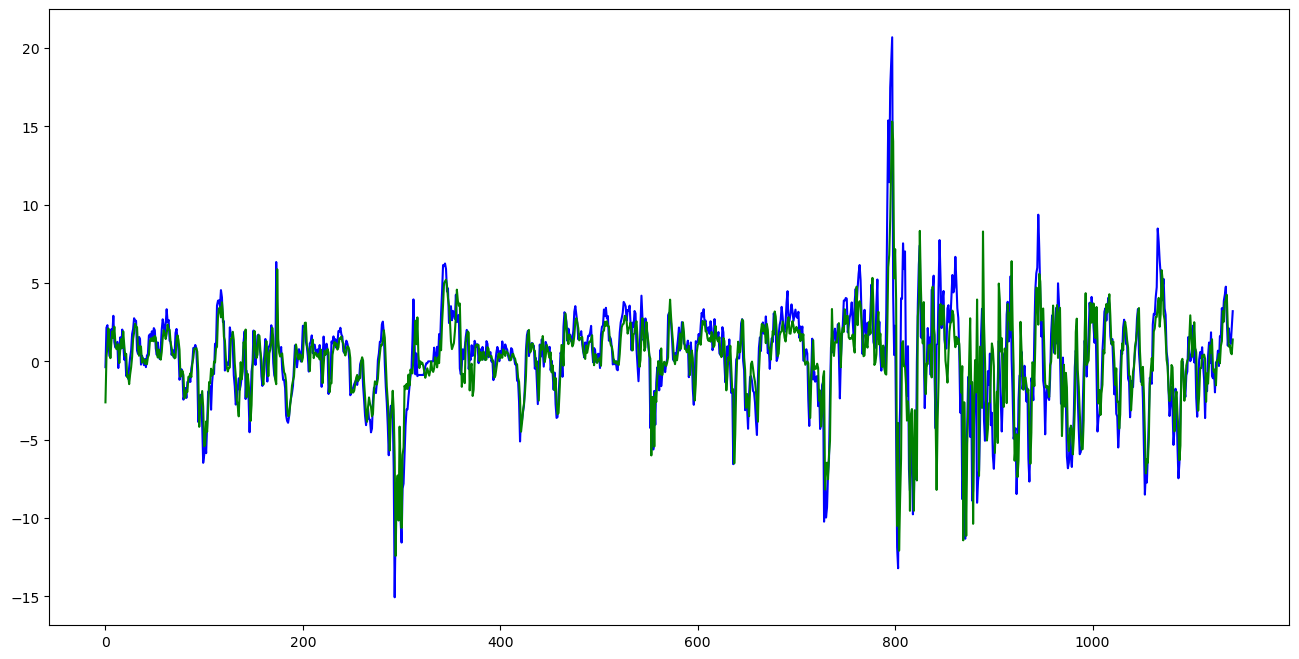

In [145]:
plt.figure(figsize=(16,8))
plt.plot(y_test,color='blue',label='test')
plt.plot(y_pred,color='green',label='pred')
plt.show()

In [203]:
data2.describe()
    


,Close
count,5752.000000
mean,63.960716
std,25.511630
min,17.450001
25%,44.544999
50%,61.660000
75%,83.459997
max,145.289993


In [204]:
close_data = data_diff.Close.values
  

In [205]:
close_data=close_data.reshape((-1))

In [206]:
def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

In [187]:
    
def predict_dates(num_prediction):
    last_date = data['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

In [207]:
num_prediction = 365
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 42ms/step


In [208]:

import plotly
import plotly.graph_objects as go

In [209]:
trace1 = go.Scatter(
    x = data['Date'].tolist(),
    y = close_data,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode = 'lines',
    name = 'Prediction'
)
layout = go.Layout(
    title = "Crude_oil_price",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()